In [1]:
# Load libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt


In [10]:
# Load main dataset
df = pd.read_csv("../05_clean_data/processed_data.csv")
df.head()


date  total_activity  citation_issued  citation_rate  day_of_week  \
0  2010-12-31             122               13       0.106557            5   
1  2011-01-01             176               23       0.130682            6   
2  2011-01-02             214               24       0.112150            7   
3  2011-01-03             250               32       0.128000            1   
4  2011-01-04             296               44       0.148649            2   

   month  days_end_month  year  days_end_year  quarter  days_end_quarter  \
0     12               0  2010            0.0        4               1.0   
1      1              30  2011          364.0        1              90.0   
2      1              29  2011          363.0        1              89.0   
3      1              28  2011          362.0        1              88.0   
4      1              27  2011          361.0        1              87.0   

     city state  
0  denver    co  
1  denver    co  
2  denver    co  
3  denver    co  
4  denver    co

## Checking citation_issued based on days_end_month for each year

### Building the function

In [151]:
def plot_time_period(city, period, data):
    """A Function to visualize the aggregated data for a given city and time period.

    Parameters
    ----------
    city: str
        The city name to visualize

    period: str
        The time period to visualize. Can be one of month, quarter, or year.

    data: pd.DataFrame
        The dataframe to visualize. Must have a column named "city."

    Returns
    -------
    None
    """

    # Filter the data by city
    city_data = data[data["city"] == city]

    if period is not None:
        i = 1

        # make a plot object
        plt.figure(figsize=((20, 20)))
        plt.subplots_adjust(hspace=0.5)

        # unique years
        years = city_data["year"].unique()

        # subplot sizes
        nrows = round(len(years) // 2, 0)

        # make a subplot for each year
        for year in years:
            # Filter the data by year
            year_data = city_data[city_data["year"] == year]

            # make a subplot
            ax = plt.subplot(nrows + 1, 4, i)

            # plot a line for each month
            for periods in year_data[period].unique():
                # Filter the data by month
                specific_data = year_data[year_data[period] == periods]

                # Plot the data
                ax.plot(
                    specific_data[f"days_end_{period}"],
                    specific_data["citation_issued"],
                    alpha=0.2,
                    color="grey",
                )

            # Plot the mean
            ax.plot(
                year_data.groupby(f"days_end_{period}")["citation_issued"].mean(),
                label="Mean",
                color="red",
            )

            # invert the x axis
            ax.invert_xaxis()

            # Set the title
            ax.set_title(f"{city.upper()} Citations for {year}")

            # Set the x axis label
            ax.set_xlabel(f"Days to end of {period}")

            # Set the y axis label
            ax.set_ylabel("Citations Issued")

            # Set the legend
            ax.legend()

            i += 1

        # Show the plot
        plt.suptitle(f"{city.upper()} Citations by {period}", y=1, fontsize=15)
        # set the position of suptitle above all subplots
        plt.tight_layout()
        plt.show()

In [214]:
def plot_citations_by_month(city, limit, df):
    city_data = df[df["city"] == city]
    years = city_data['year'].unique()
    # sort years in ascending order
    years.sort()
    i=1
    # groupby city data by days_end_month and year reset index
    city_data_gb = city_data.groupby(['days_end_month', 'year']).sum().reset_index()
    # make a column true if days_end_month is less than limit
    city_data_gb[f'{limit}_days_end_month'] = city_data_gb['days_end_month'].apply(lambda x: True if x < limit else False)
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.5)
    nrows = round(len(years) // 2, 0)
    for year in years:
        ax = plt.subplot(nrows + 1, 4, i)
        year_data = city_data_gb[(city_data_gb['year'] == year) & (city_data_gb[f'{limit}_days_end_month'] == True)]
        ax.bar(year_data['days_end_month'], year_data['citation_issued'])
        # create a line that shows the mean of citations issued for only that year
        ax.axhline(year_data['citation_issued'].mean(), color='red', label='Mean')
        ax.invert_xaxis()
        ax.set_title(f"{city.upper()} Citations for {year}")
        ax.set_xlabel(f"Days to end of month")
        ax.set_ylabel("Citations Issued")
        i += 1
    plt.suptitle(f"{city.upper()} Citations by month with limit {limit} "\
                    f"days to the end of month", y=1, fontsize=15)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_time_quarter(city, period, data):
    city_data = data[data["city"] == city]
    if period is not None:
        i = 1
        plt.figure(figsize=((20, 15)))
        plt.subplots_adjust(hspace=0.5)
        quarters = [1, 2, 3, 4]
        nrows = round(len(quarters) // 2, 0)
        for quarter in quarters:
            quarter_data = city_data[city_data["quarter"] == quarter]
            ax = plt.subplot(nrows + 1, 4, i)
            for periods in quarters:
                days_quarter_data = quarter_data[quarter_data[period] == periods]
                ax.plot(
                    days_quarter_data[f"days_end_{period}"],
                    days_quarter_data["citation_issued"],
                    alpha=0.2,
                    color="grey",
                )
            ax.plot(
                quarter_data.groupby(f"days_end_{period}")["citation_issued"].mean(),
                label="Mean",
                color="red",
            )
            ax.invert_xaxis()
            ax.set_title(f"{city.upper()} Citations for Q{quarter} in all years")
            ax.set_xlabel(f"Days to end of {period}")
            ax.set_ylabel("Citations Issued")
            ax.legend()
            i += 1
        plt.suptitle(f"{city.upper()} Citations by {period}", y=1, fontsize=15)
        plt.tight_layout()
        plt.show()

### Checking all cities

In [ ]:
# This code will run for all cities
for city in df.city.unique():
    plot_time_period(city, "month", df)

> Based on the spike of mean in `Cincinnati`, `Seattle`, and `Madison`, we will look further into these cities. `Durham` is an addition as it is the current city of residence.

In [155]:
susp_cities = ['cincinnati', 'seattle', 'madison', 'durham']

### Cincinnati

#### Months

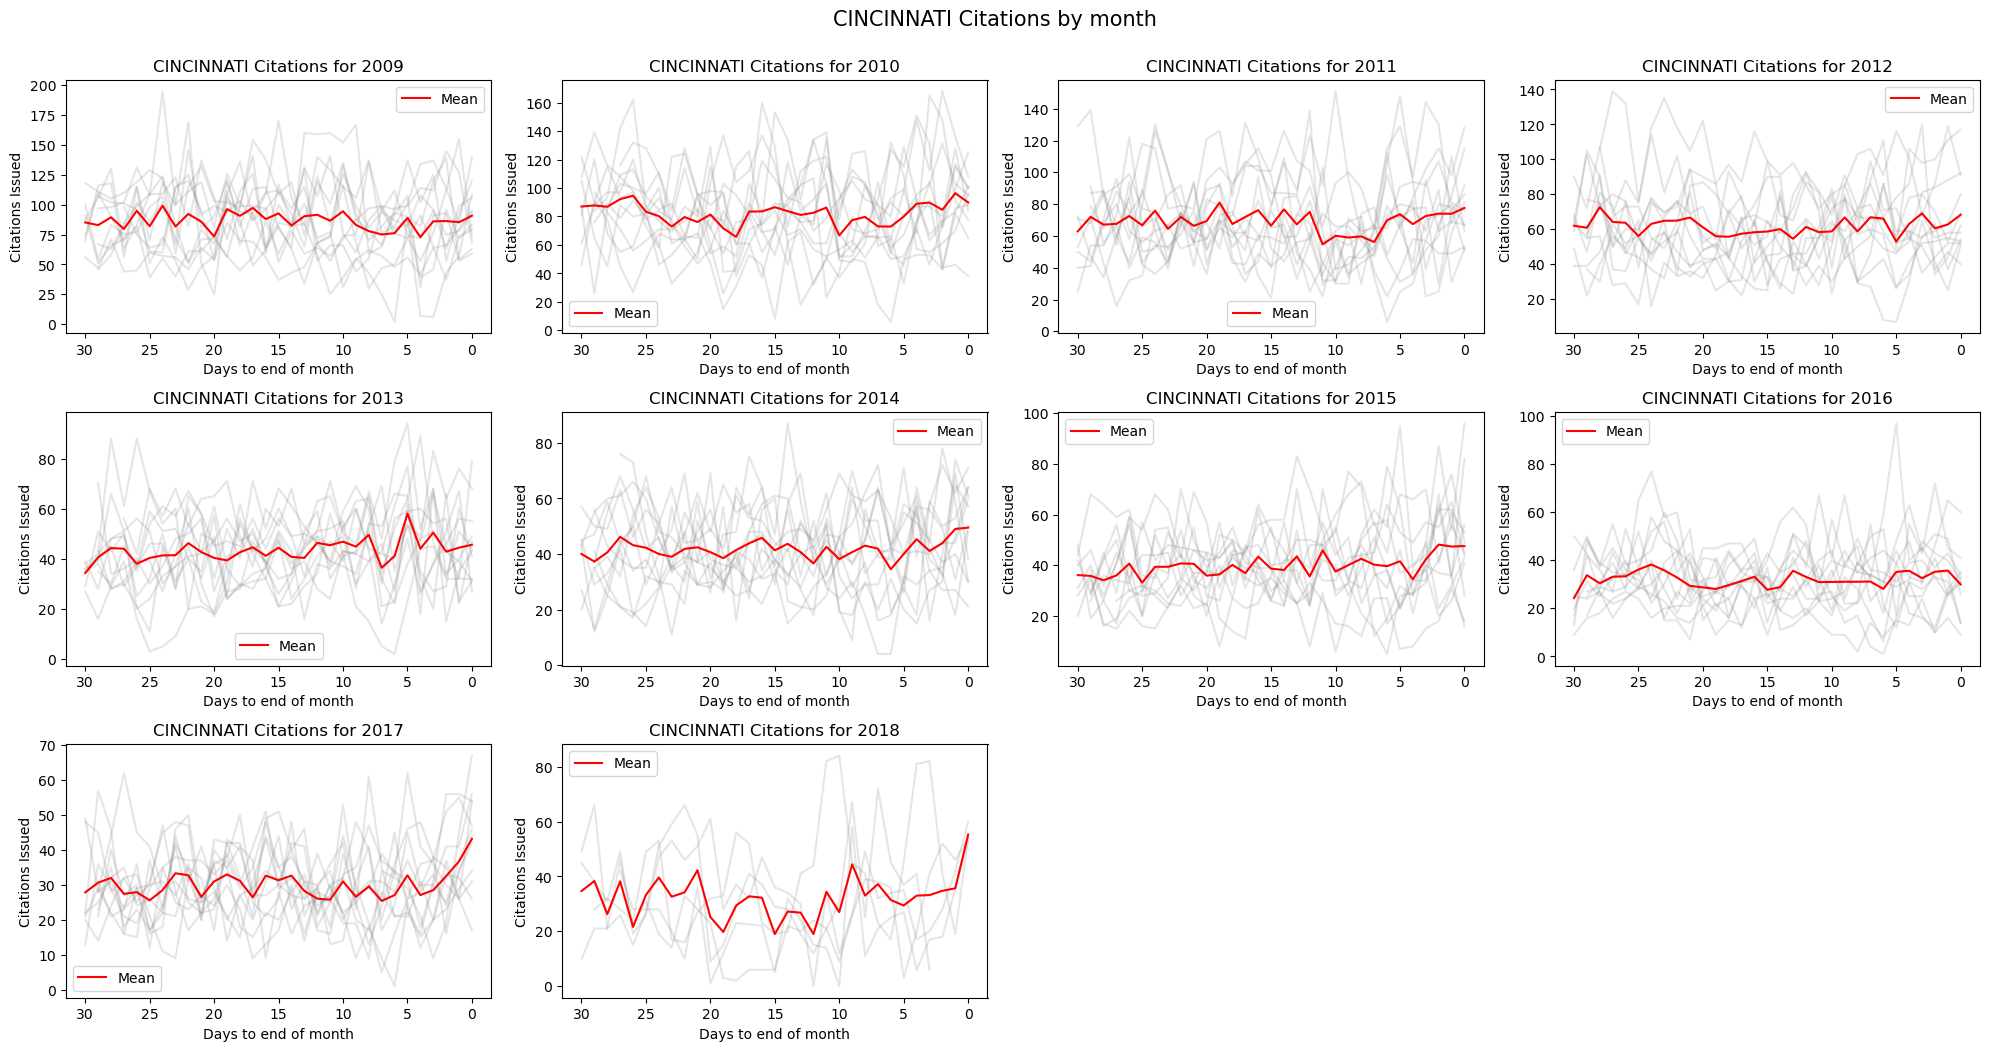

In [156]:
plot_time_period(susp_cities[0], "month", df)

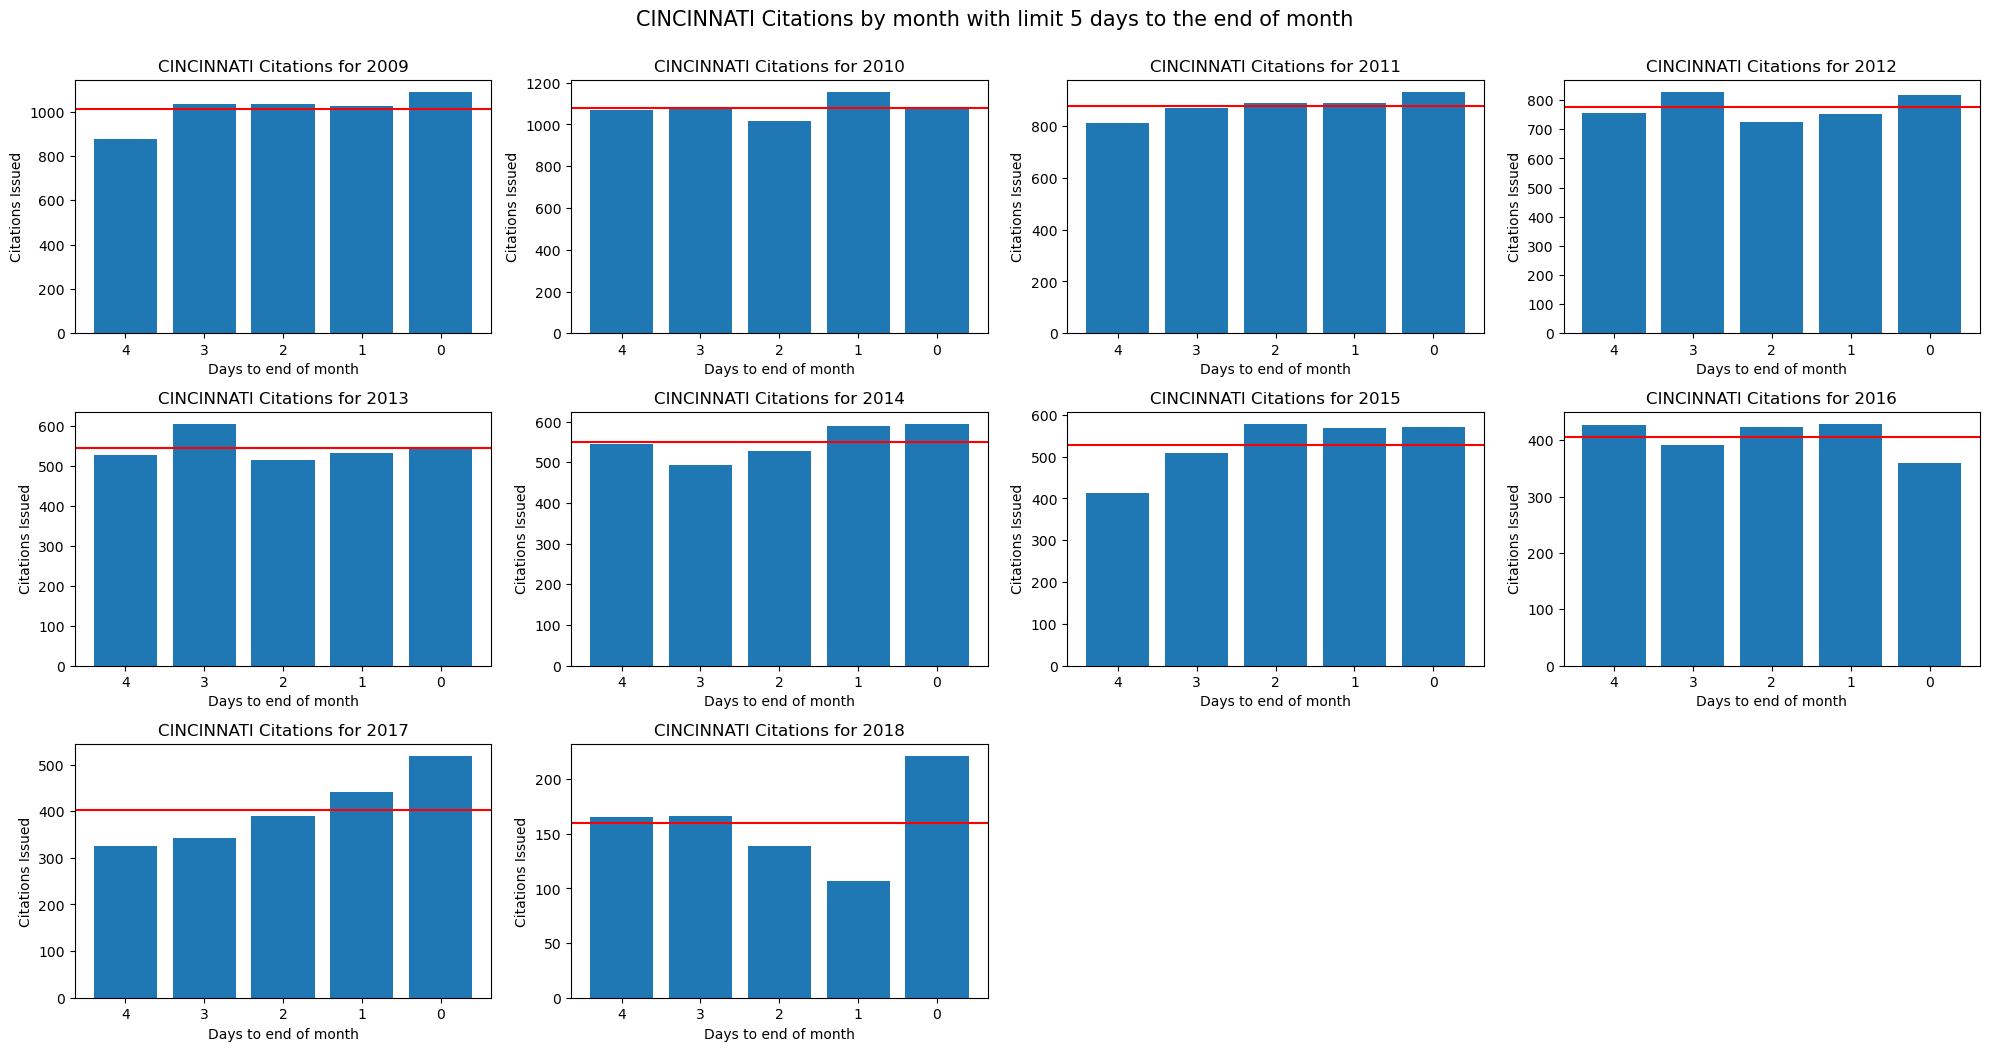

In [215]:
plot_citations_by_month(susp_cities[0], 5, df)

> Cutting off at 5 days to the end of the month seems to showed a pattern in Cincinnati in 2011, 2012, 2015, 2017

#### Quarter

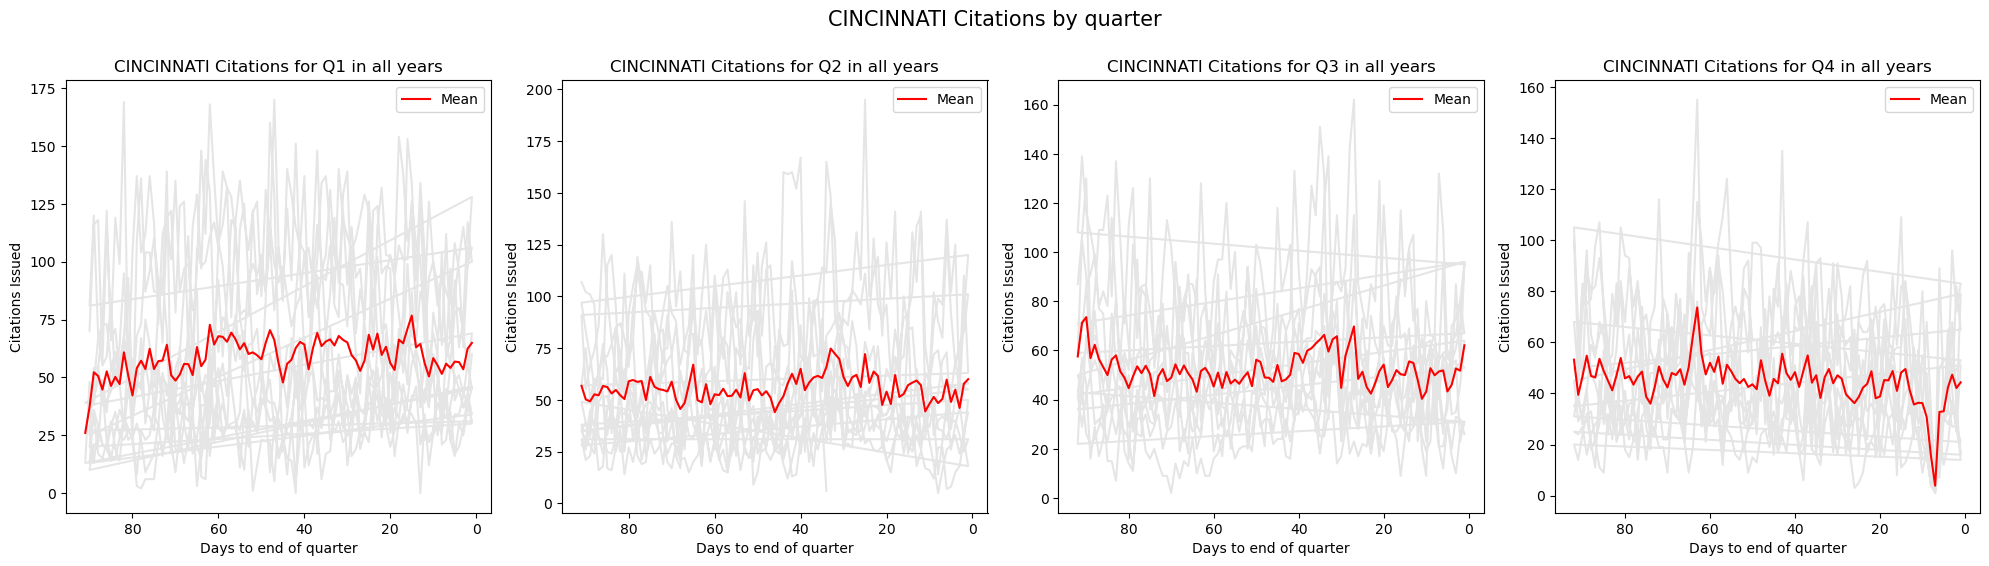

In [159]:
# Checking suspicious quarters
plot_time_quarter(susp_cities[0], "quarter", df)

> There seems to be a spike in Cincinnati towards the end of each quarter, but note that it could be caused by a lot of different reasons/variables.

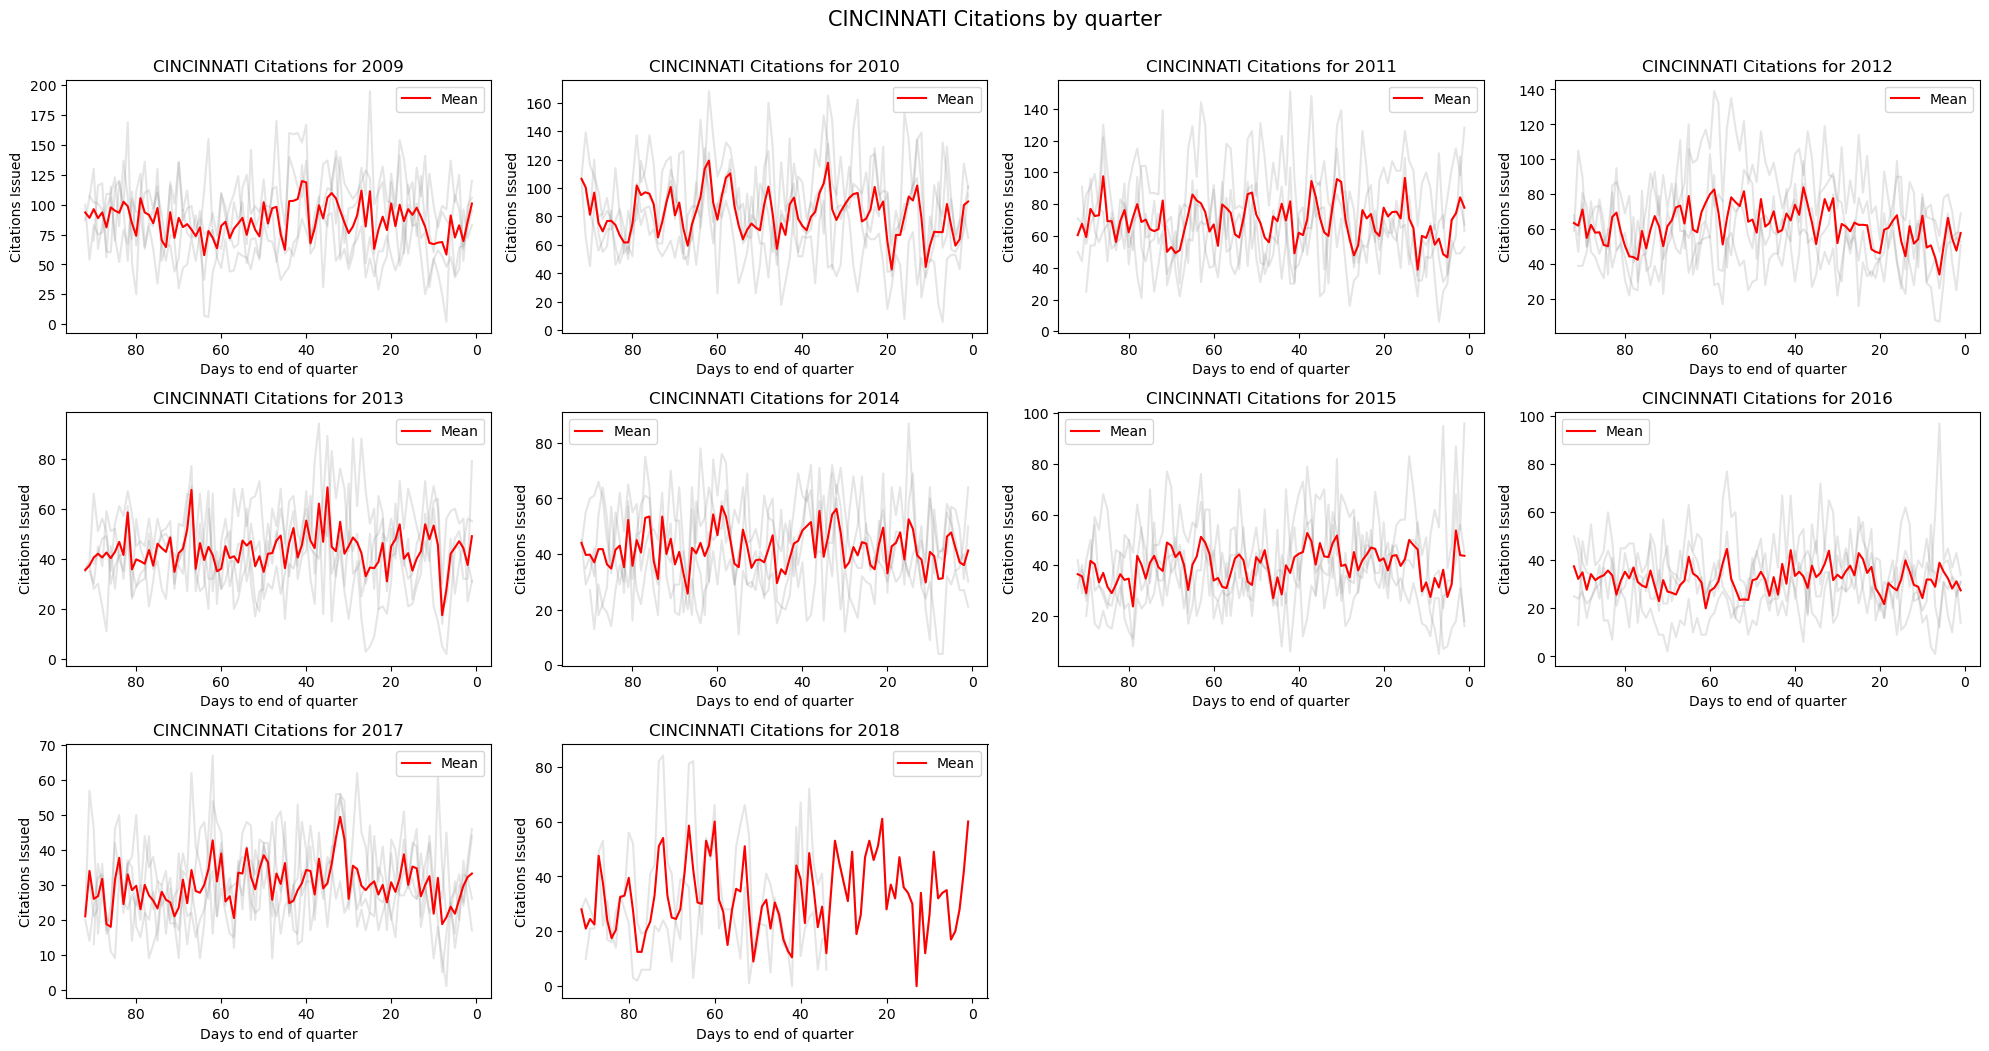

In [158]:
# Checking suspicious years based on days remaining to end of quarter
plot_time_period(susp_cities[0], "quarter", df)

> Suspicious years in Cincinnati based on quarters: 2009, 2010, 2011, 2013, 2015, 2017, 2018

### Seattle

#### Months

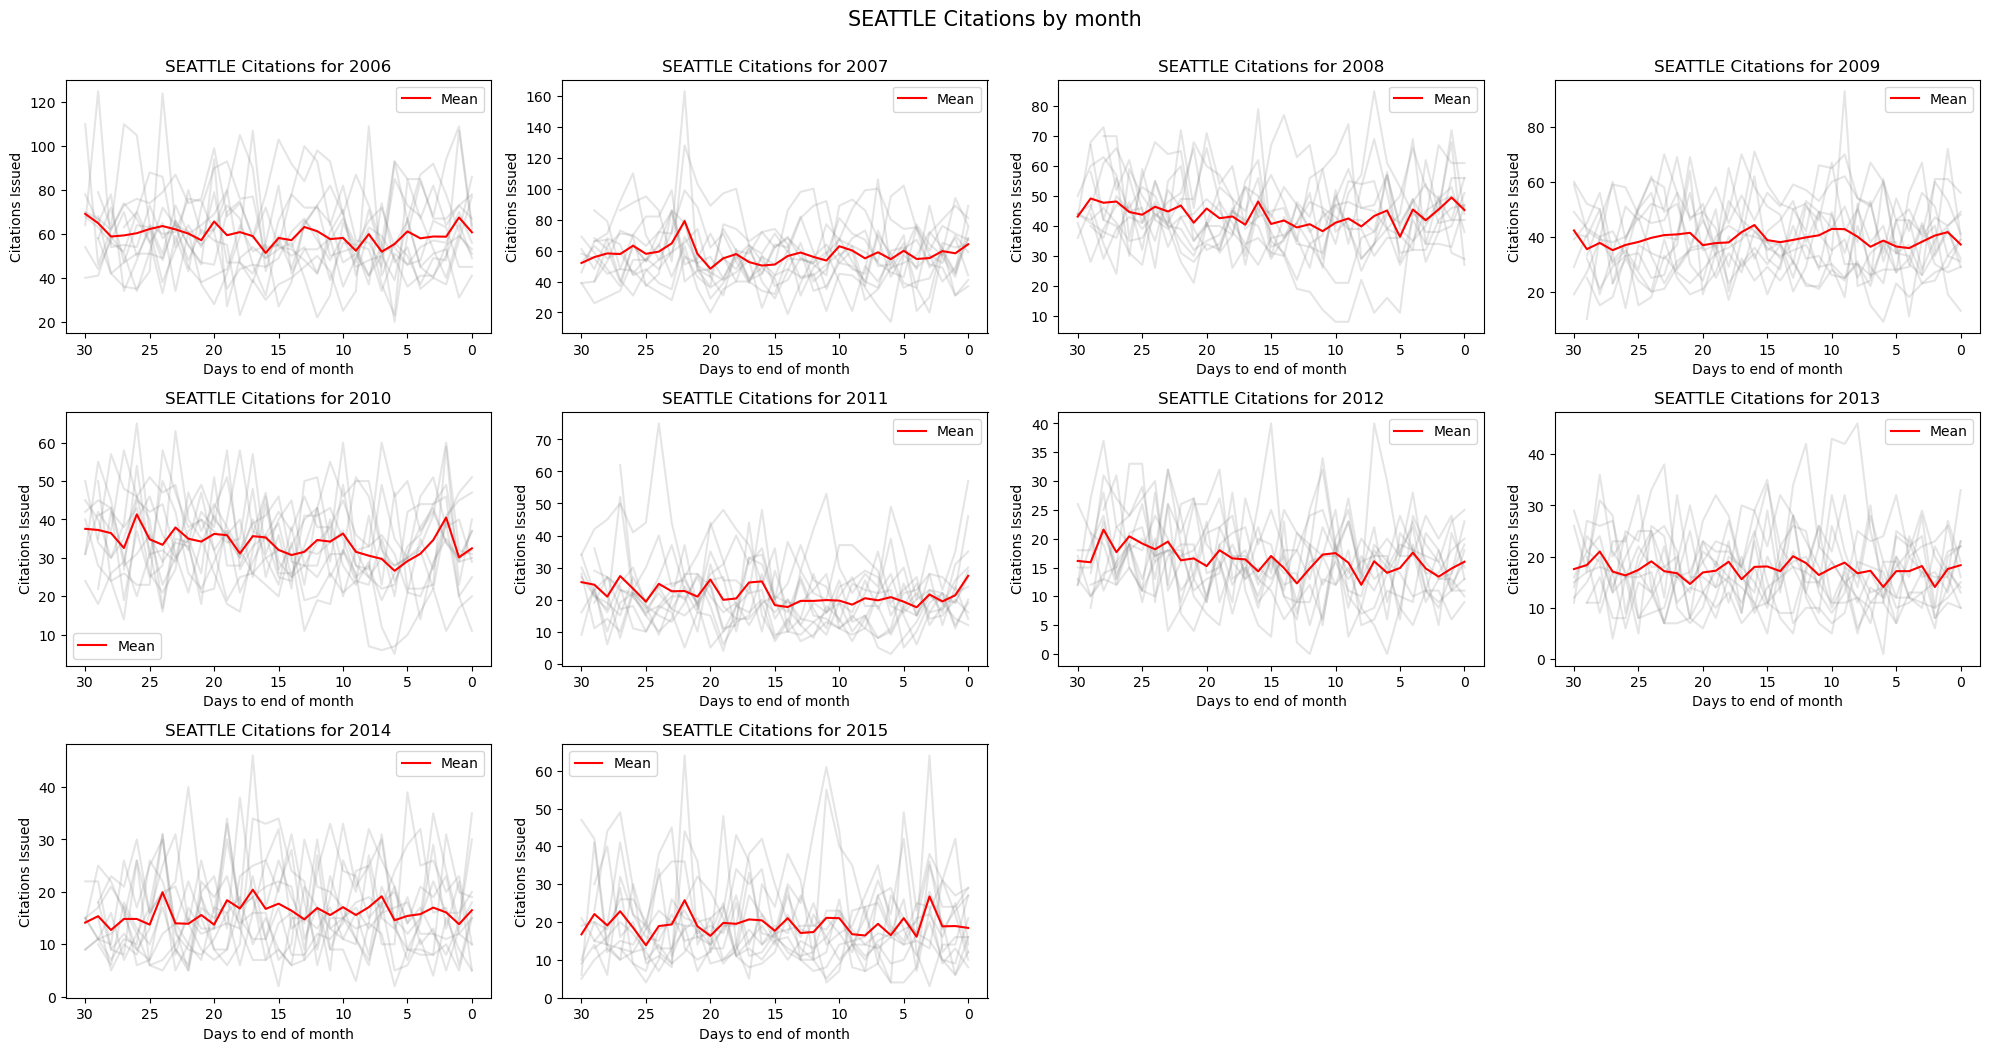

In [160]:
# Ensuring suspicious pattern
plot_time_period(susp_cities[1], "month", df)

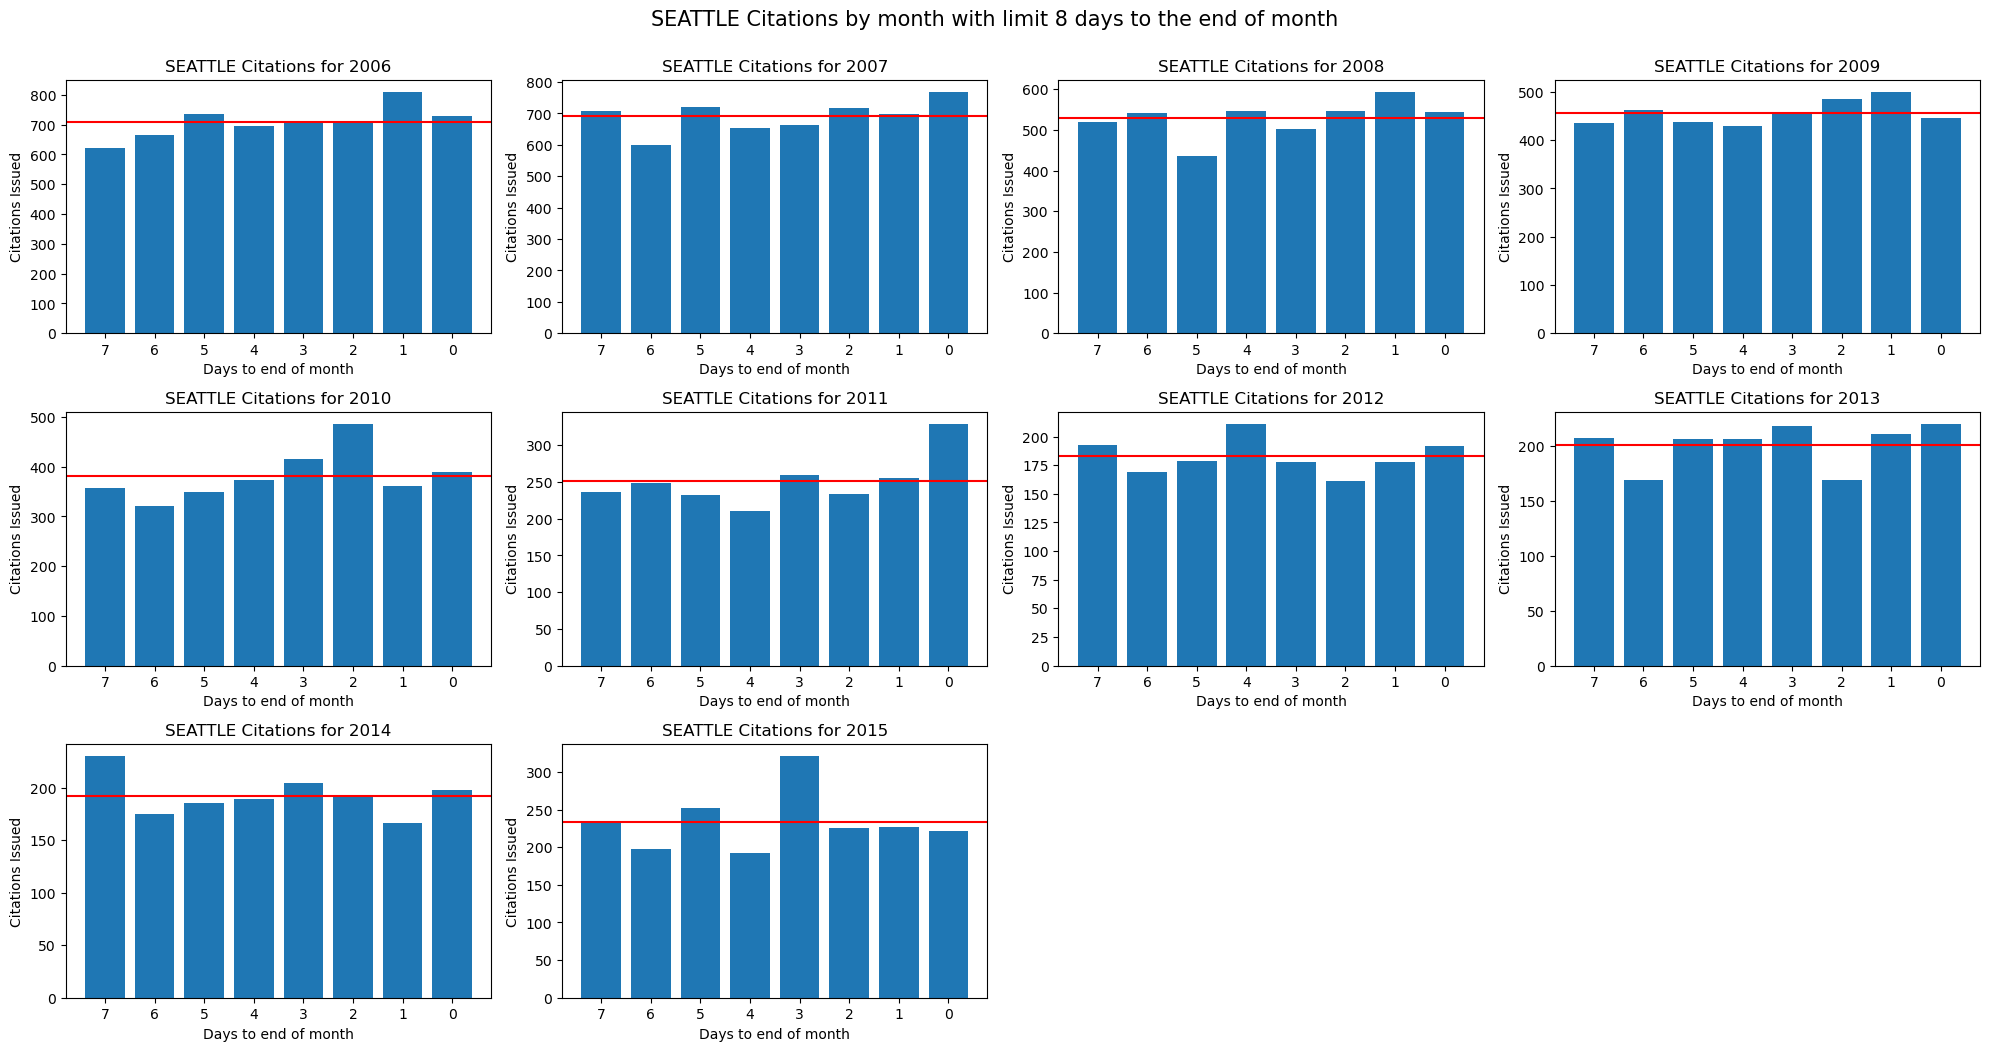

In [216]:
# plot the months
plot_citations_by_month(susp_cities[1], 8, df)

> Cutting off at 8 days seems to showed a pattern in Seattle in 2010, 2011, 2012, 2013

#### Quarter

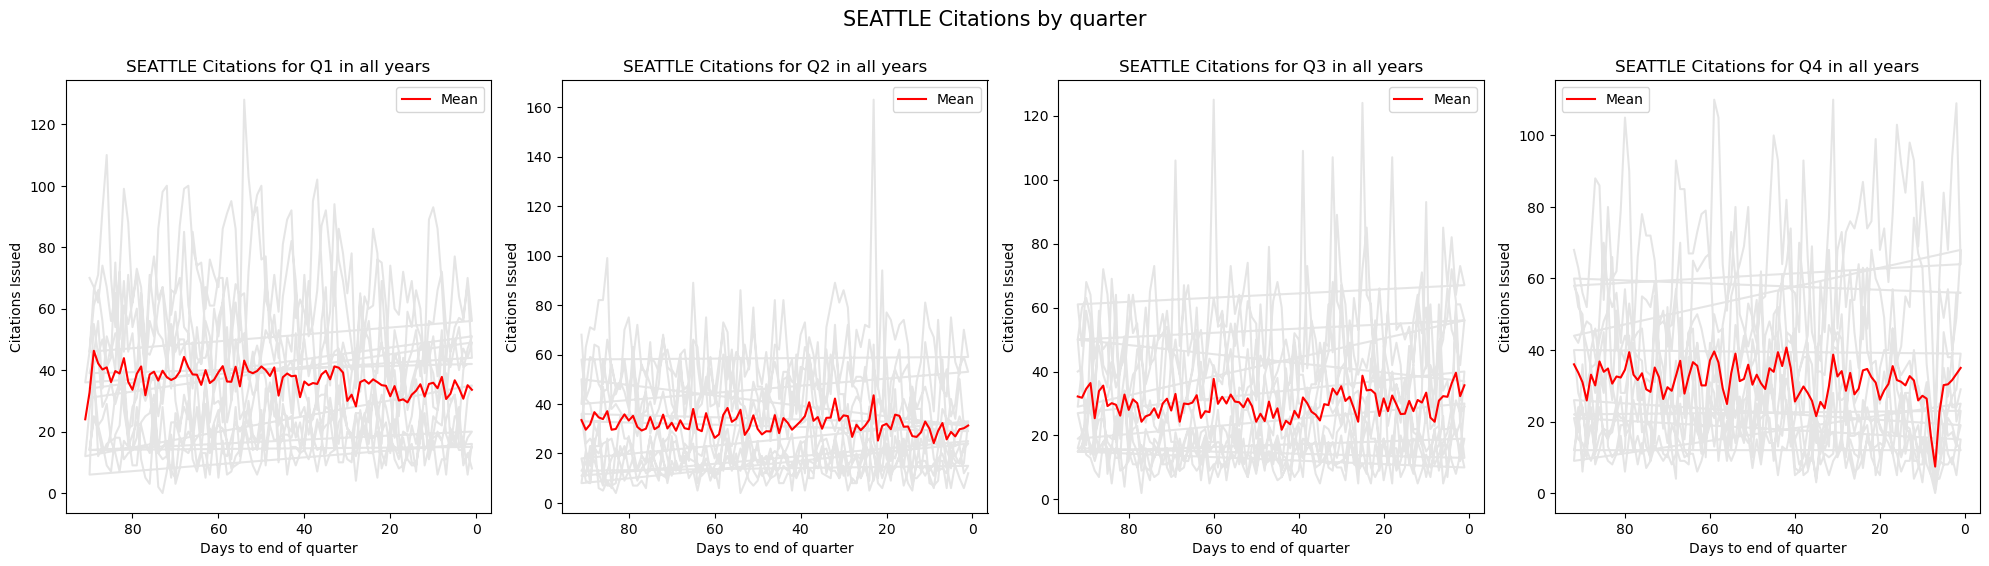

In [206]:
# Checking suspicious quarters
plot_time_quarter(susp_cities[1], "quarter", df)

> The only spikes in Seattle are in Q2, Q3, and Q4.

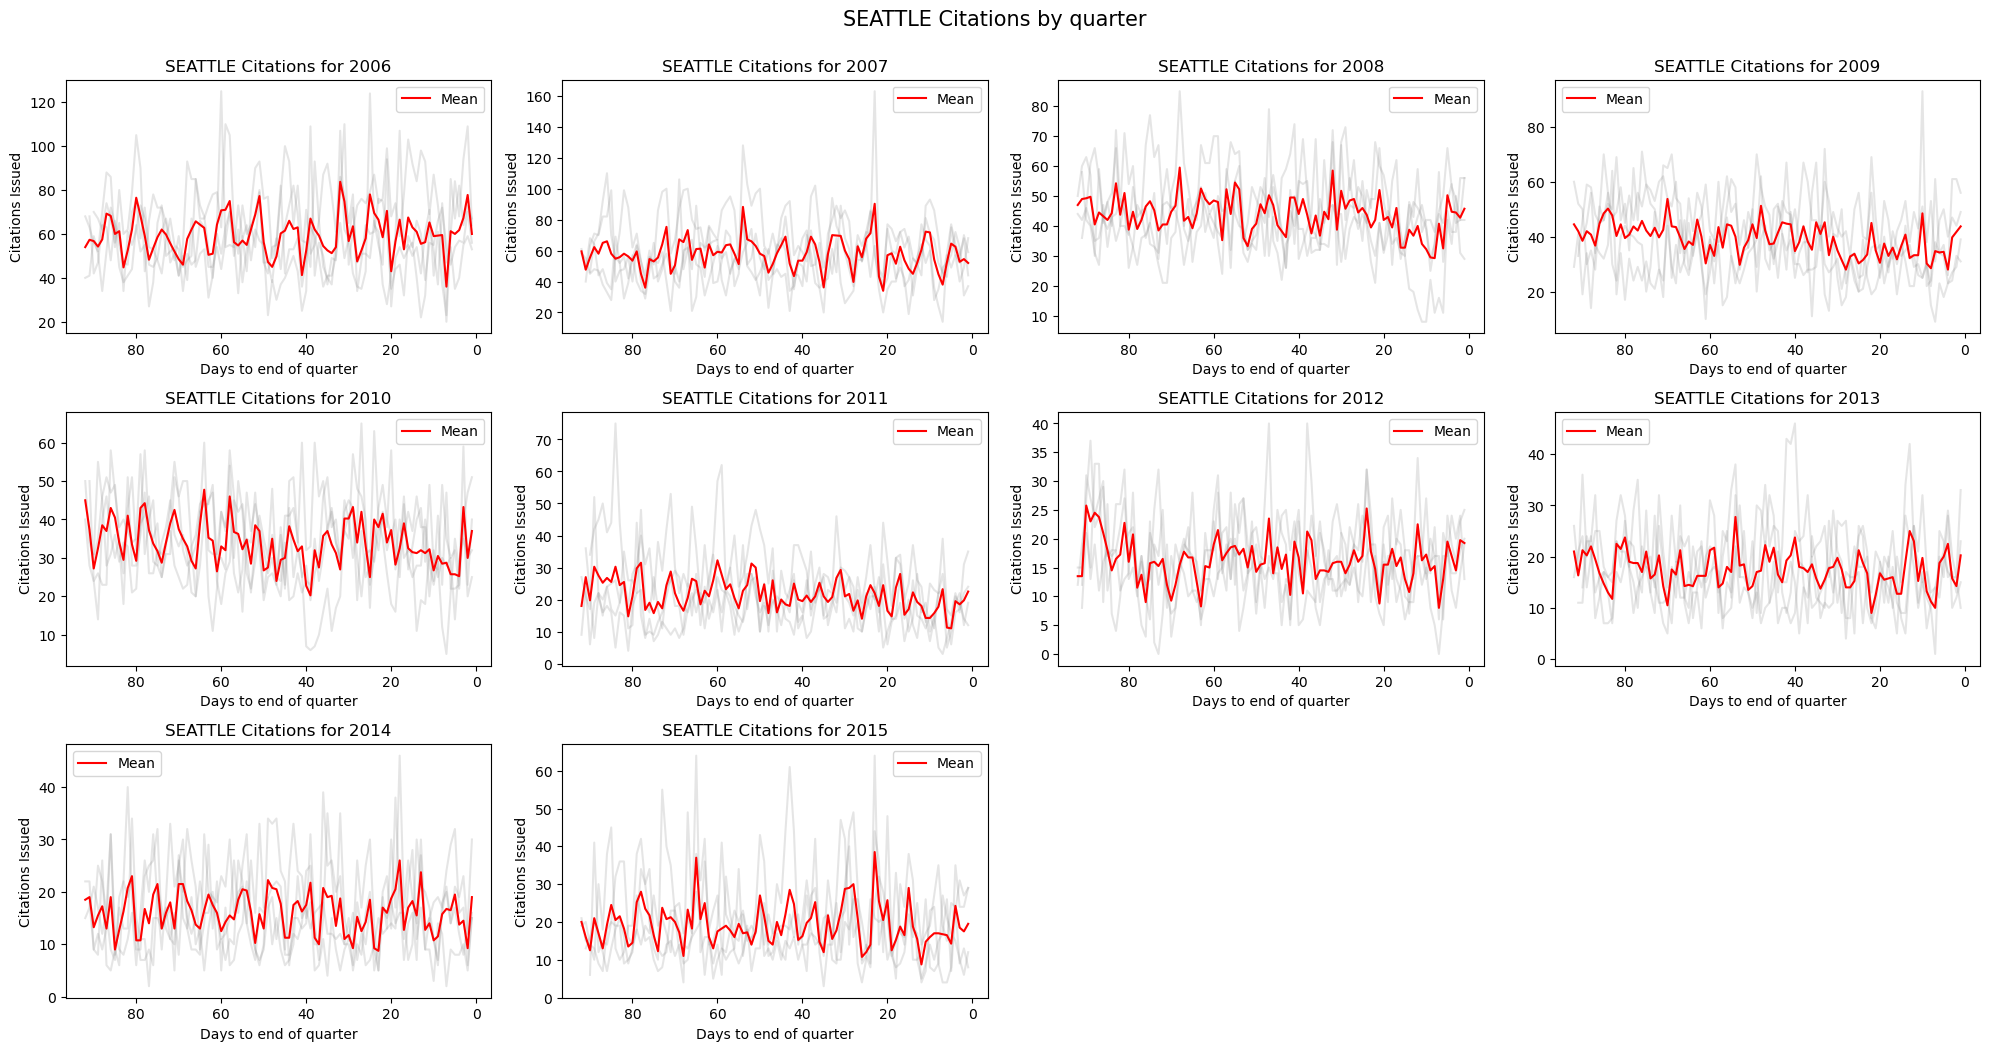

In [163]:
# Checking suspicious quarters
plot_time_period(susp_cities[1], "quarter", df)

### Madison

#### Months

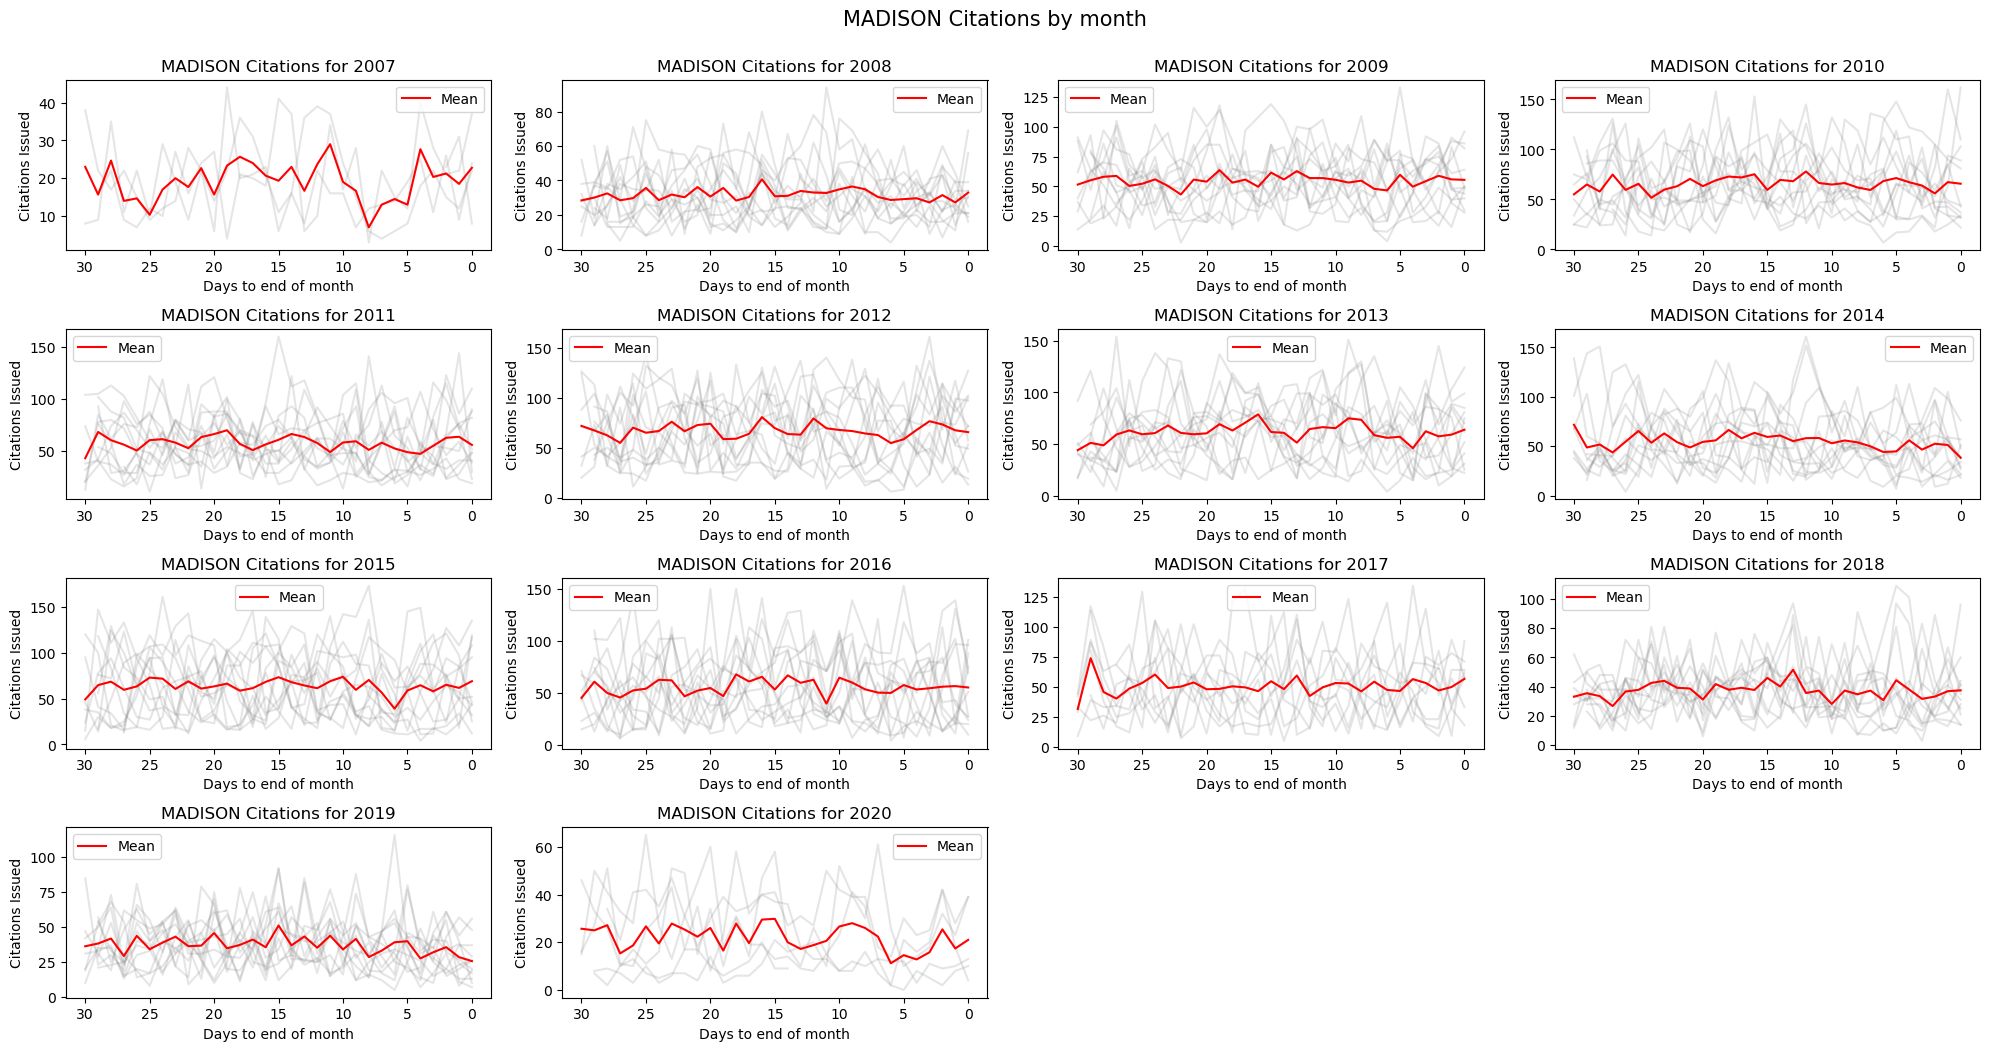

In [165]:
# Ensuring pattern
plot_time_period(susp_cities[2], "month", df)

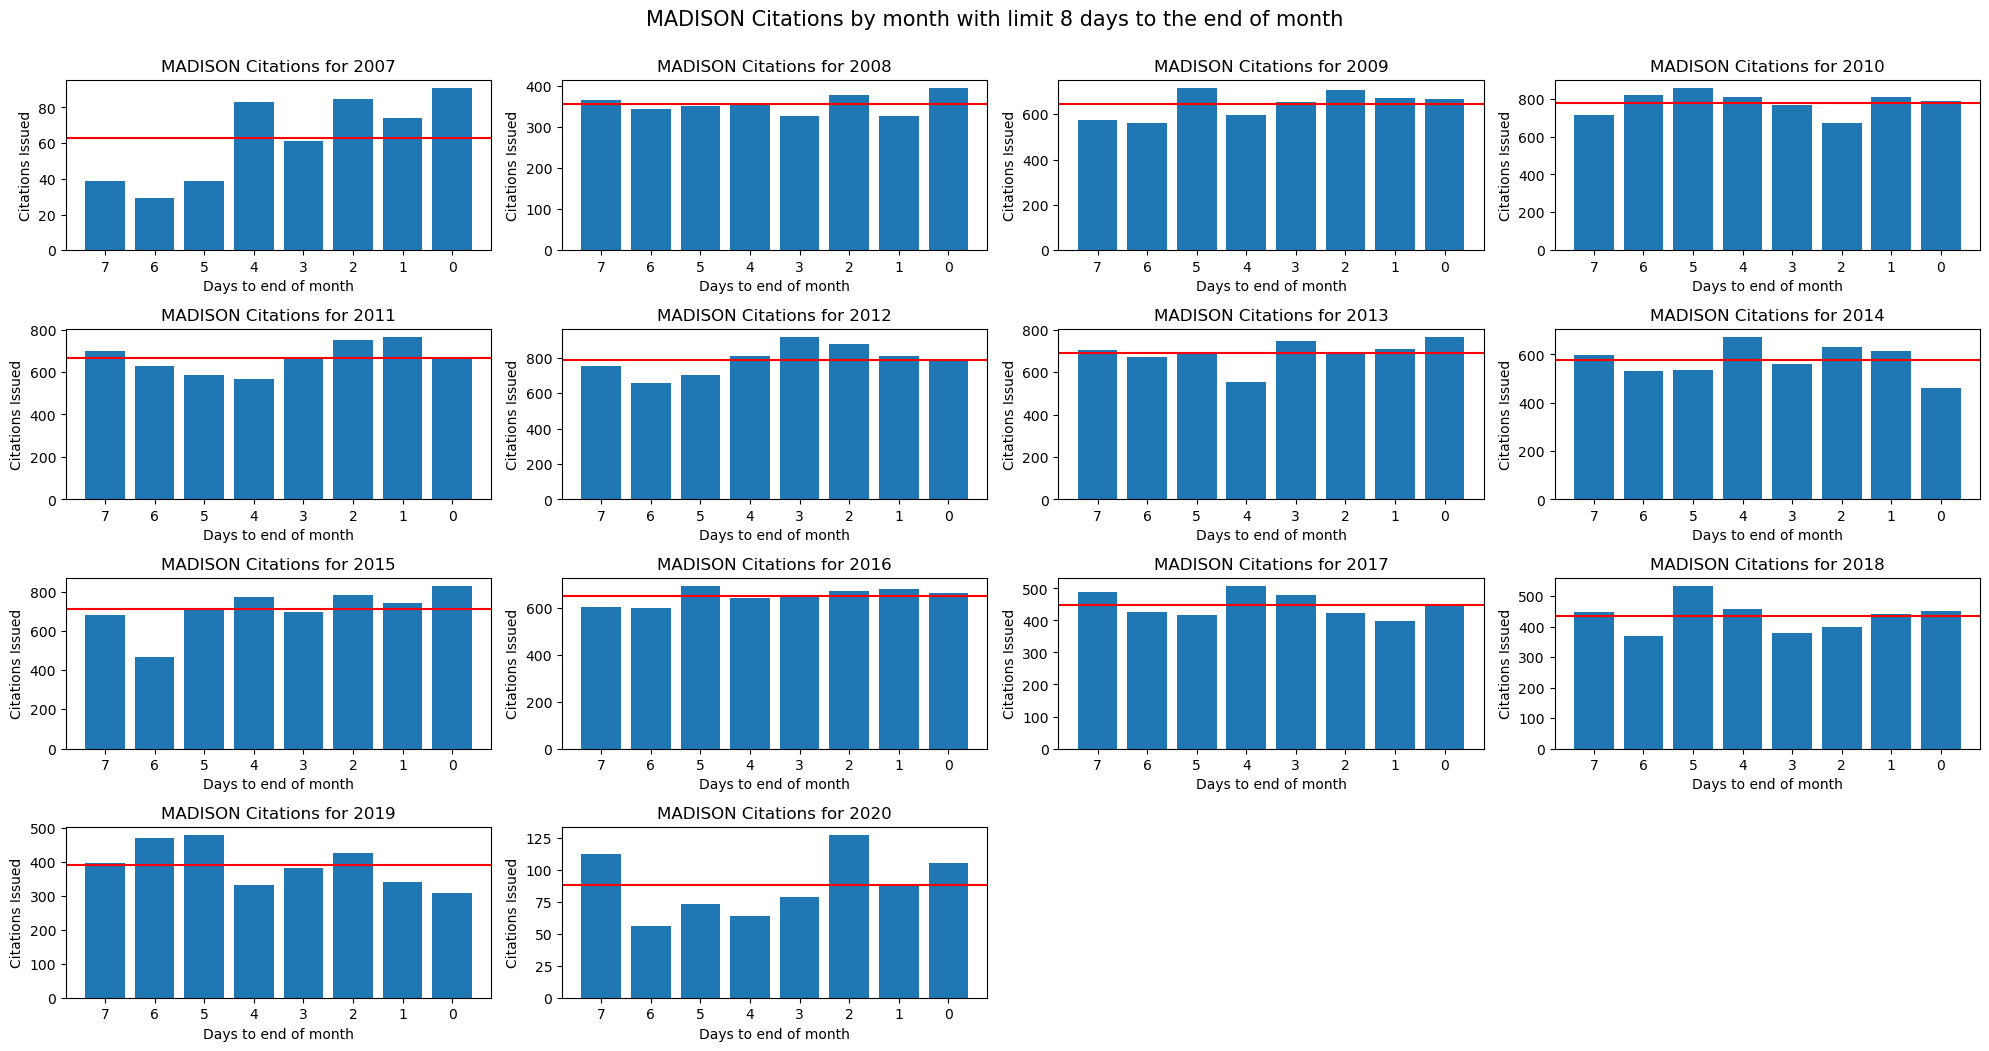

In [217]:
# plot the months
plot_citations_by_month(susp_cities[2], 8, df)

> There seems to be no apparent pattern in Madison

#### Quarter

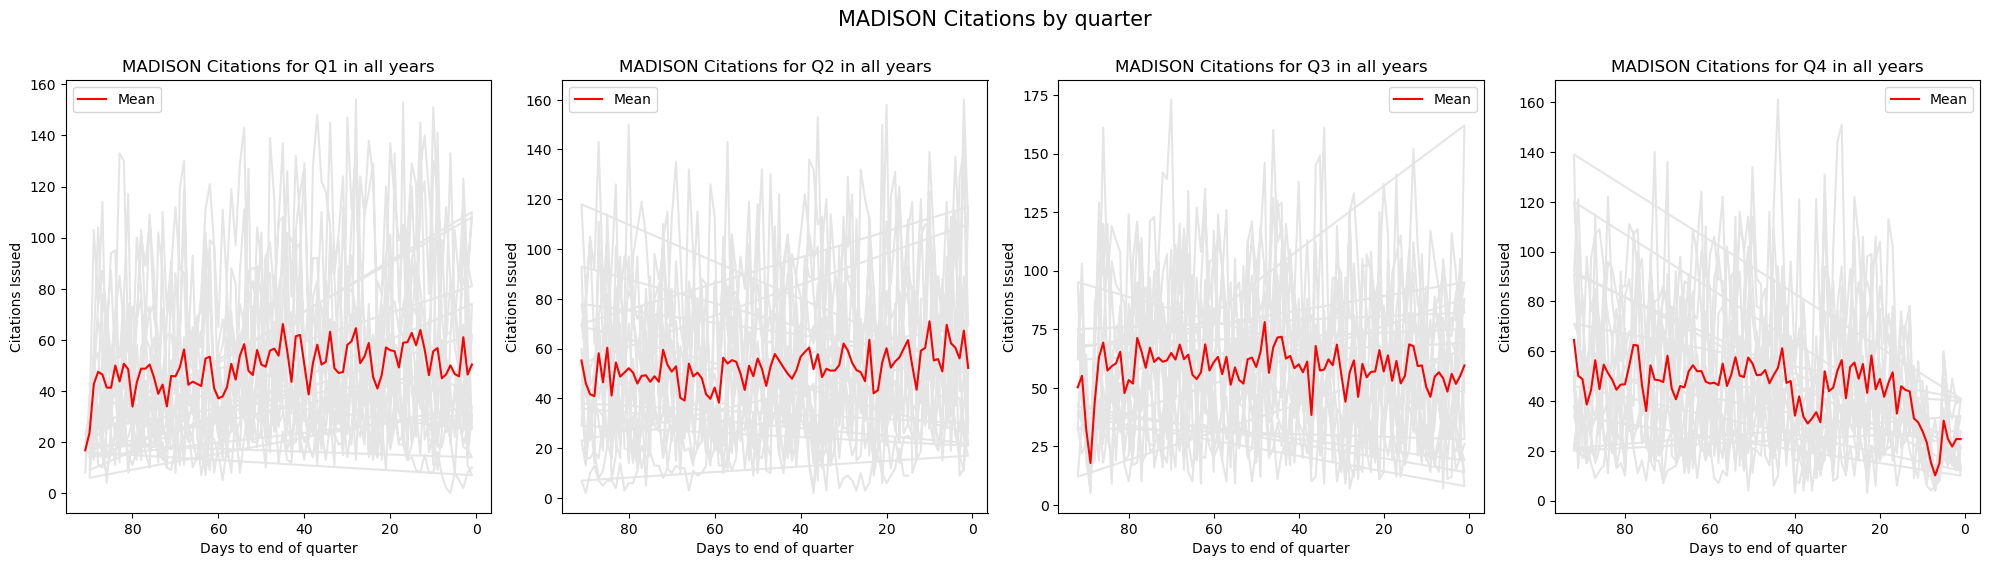

In [166]:
# Checking suspicious quarters
plot_time_quarter(susp_cities[2], "quarter", df)

> The same spikes as Seattle (Q2 and Q3).

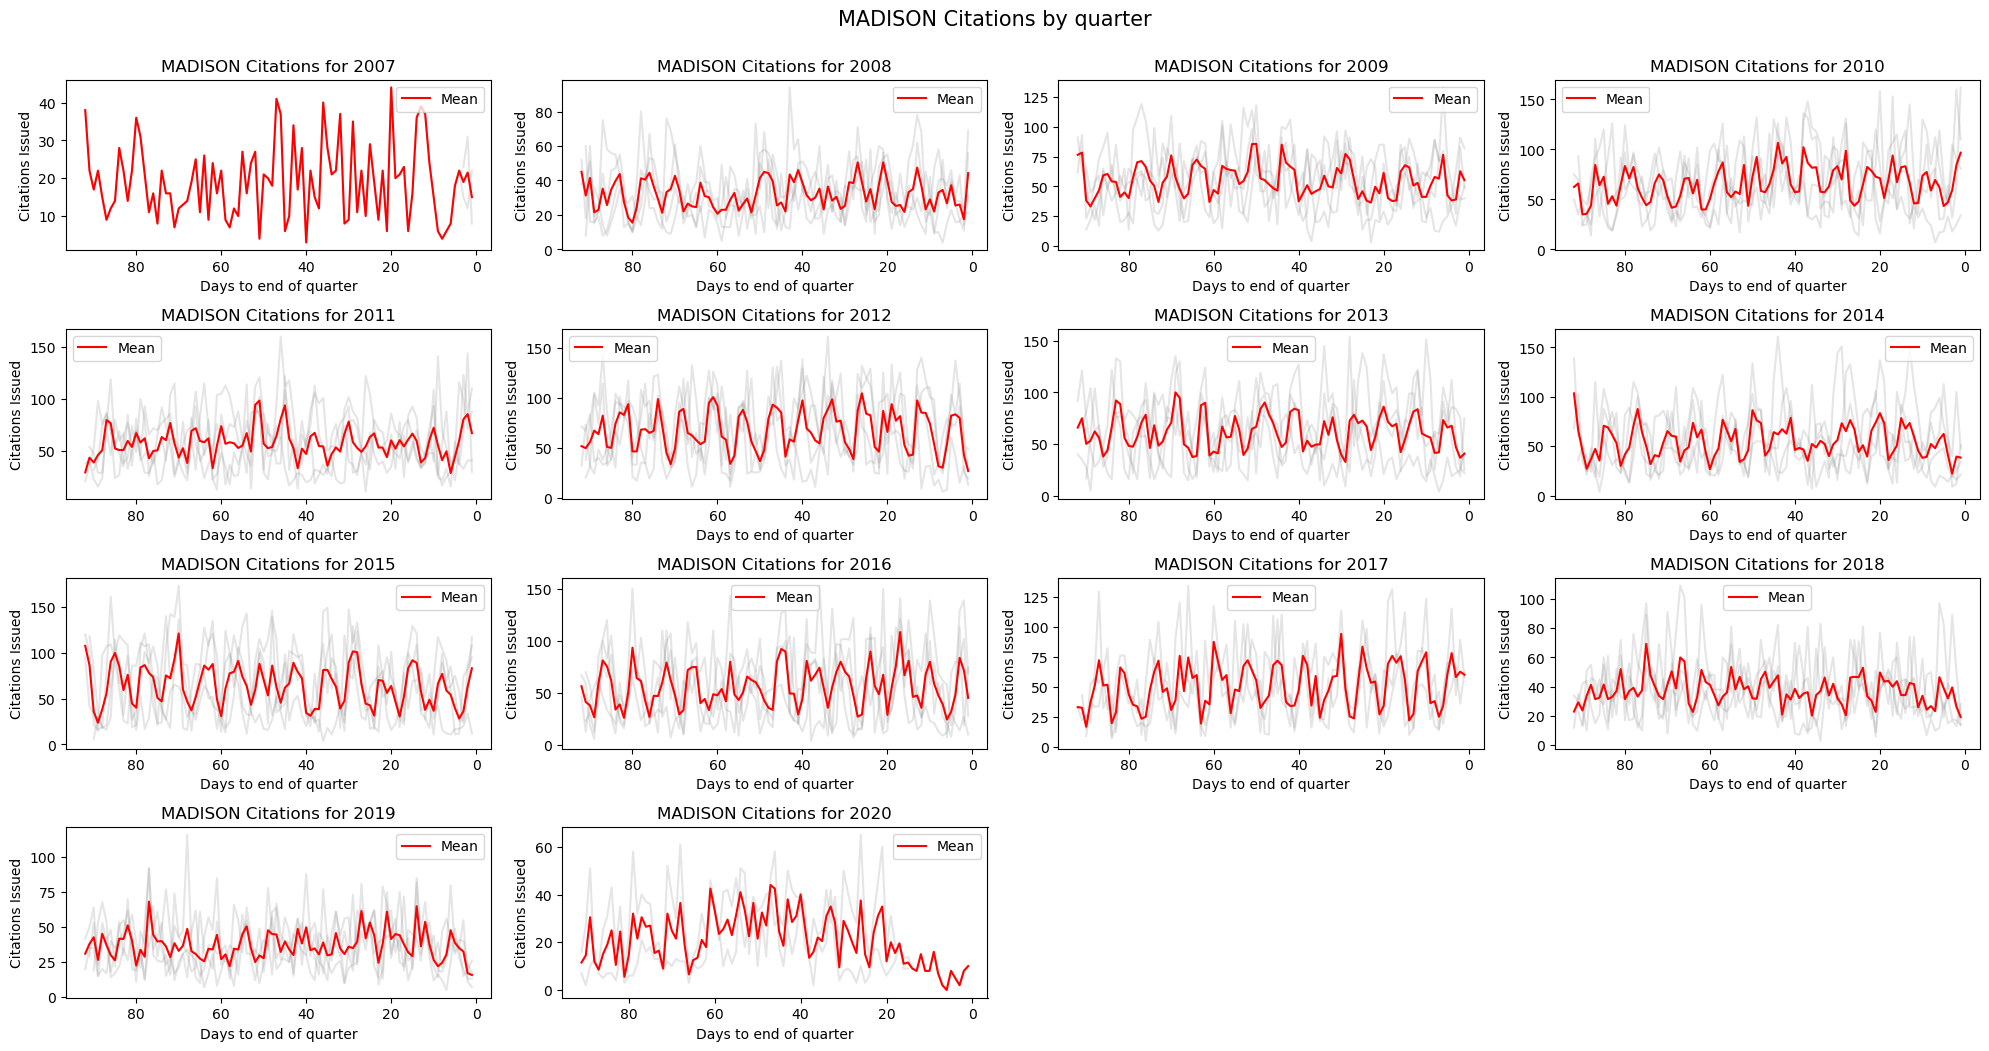

In [168]:
# Checking suspicious years based on days remaining to end of quarter
plot_time_period(susp_cities[2], "quarter", df)

### Durham

#### Months

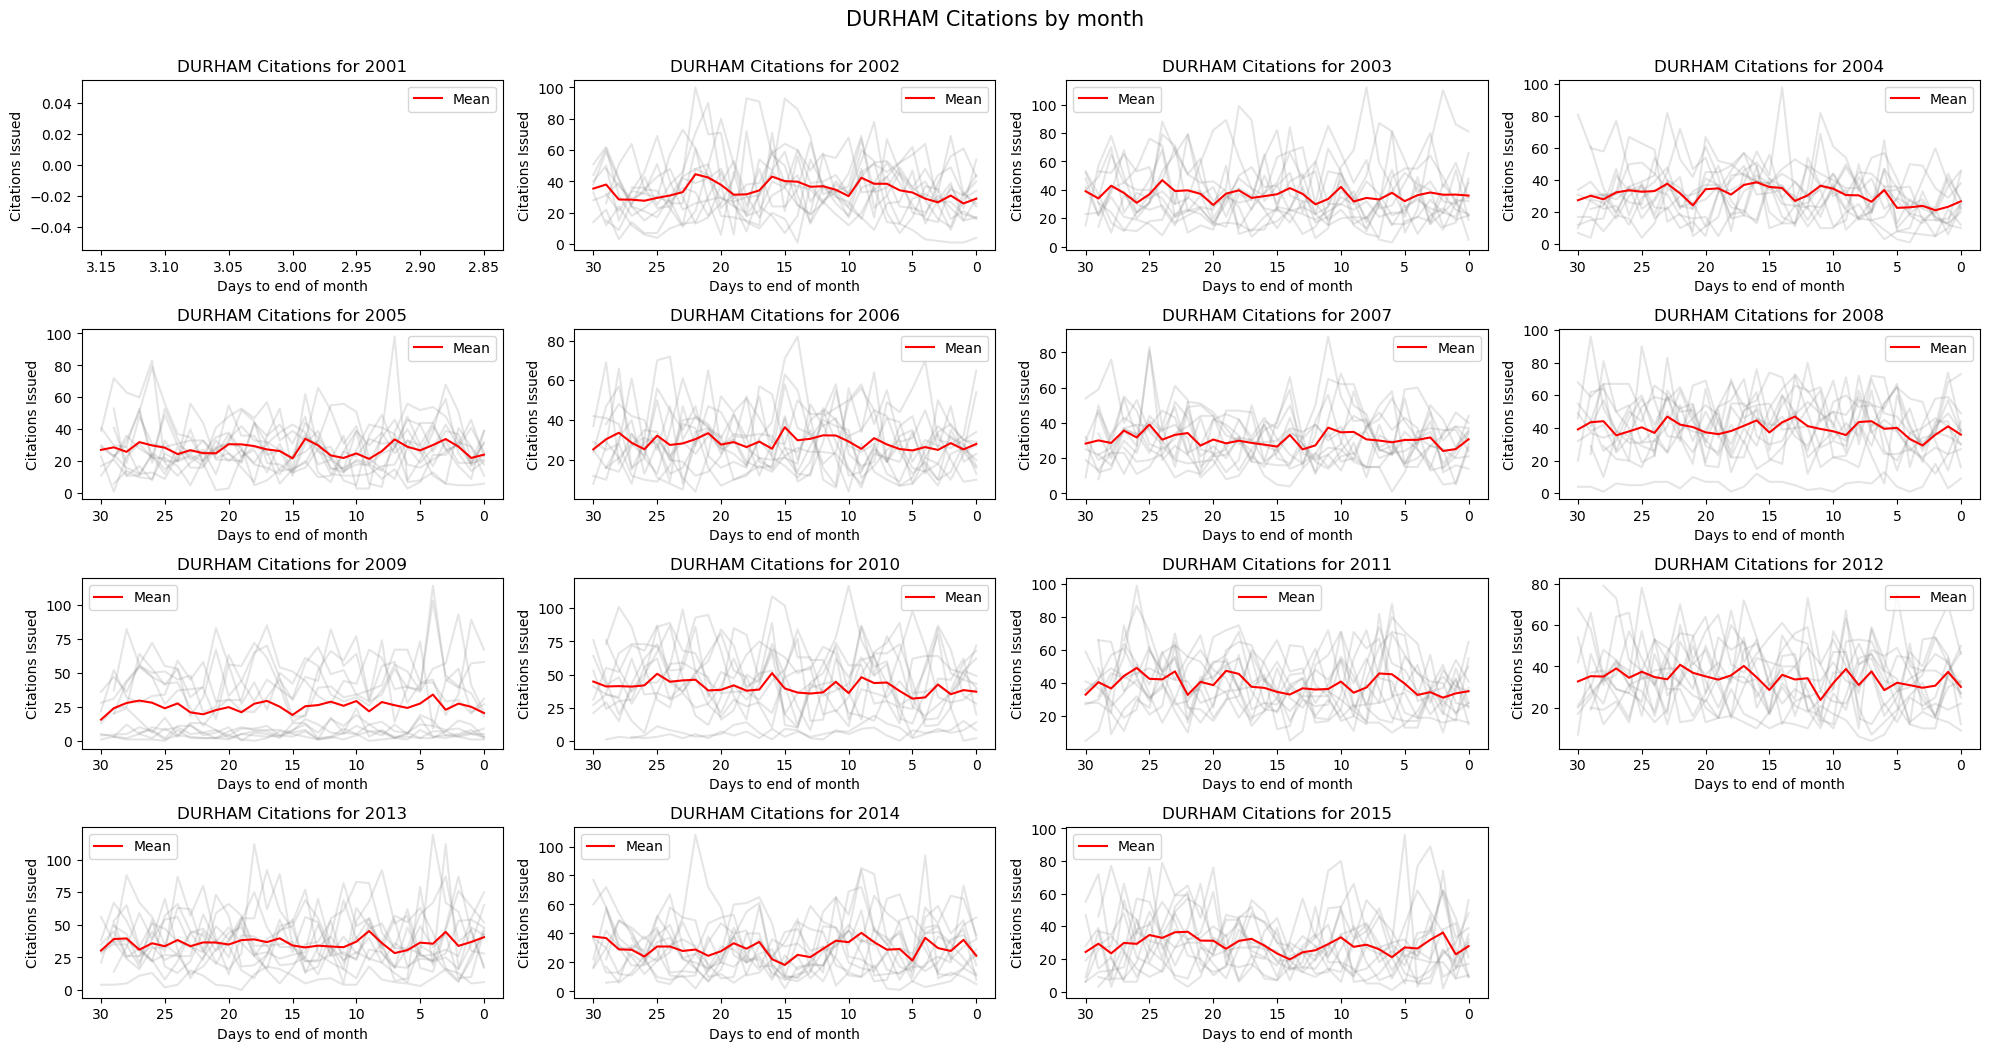

In [169]:
# Checking suspicious pattern
plot_time_period("durham", "month", df)

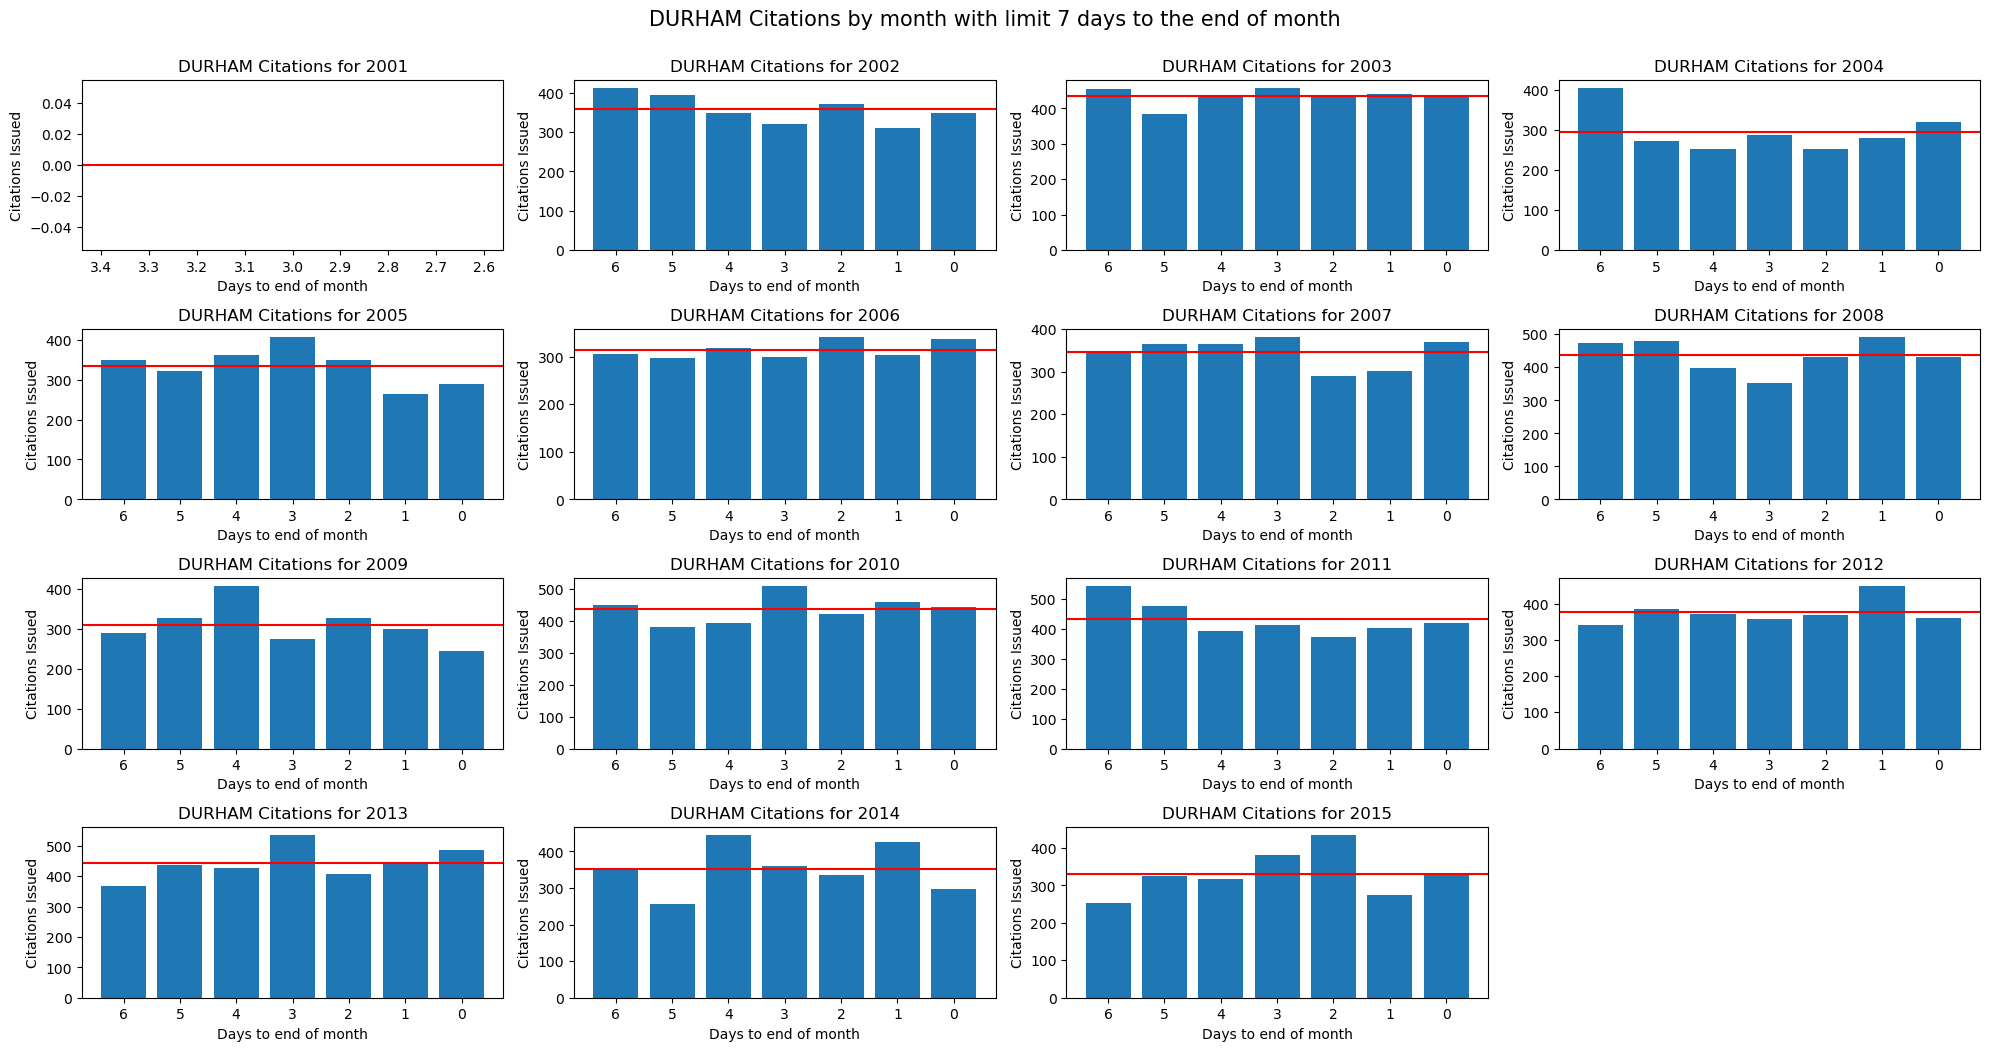

In [218]:
plot_citations_by_month('durham', 7, df)

> There seems to be no obvious pattern in Durham.

#### Quarter

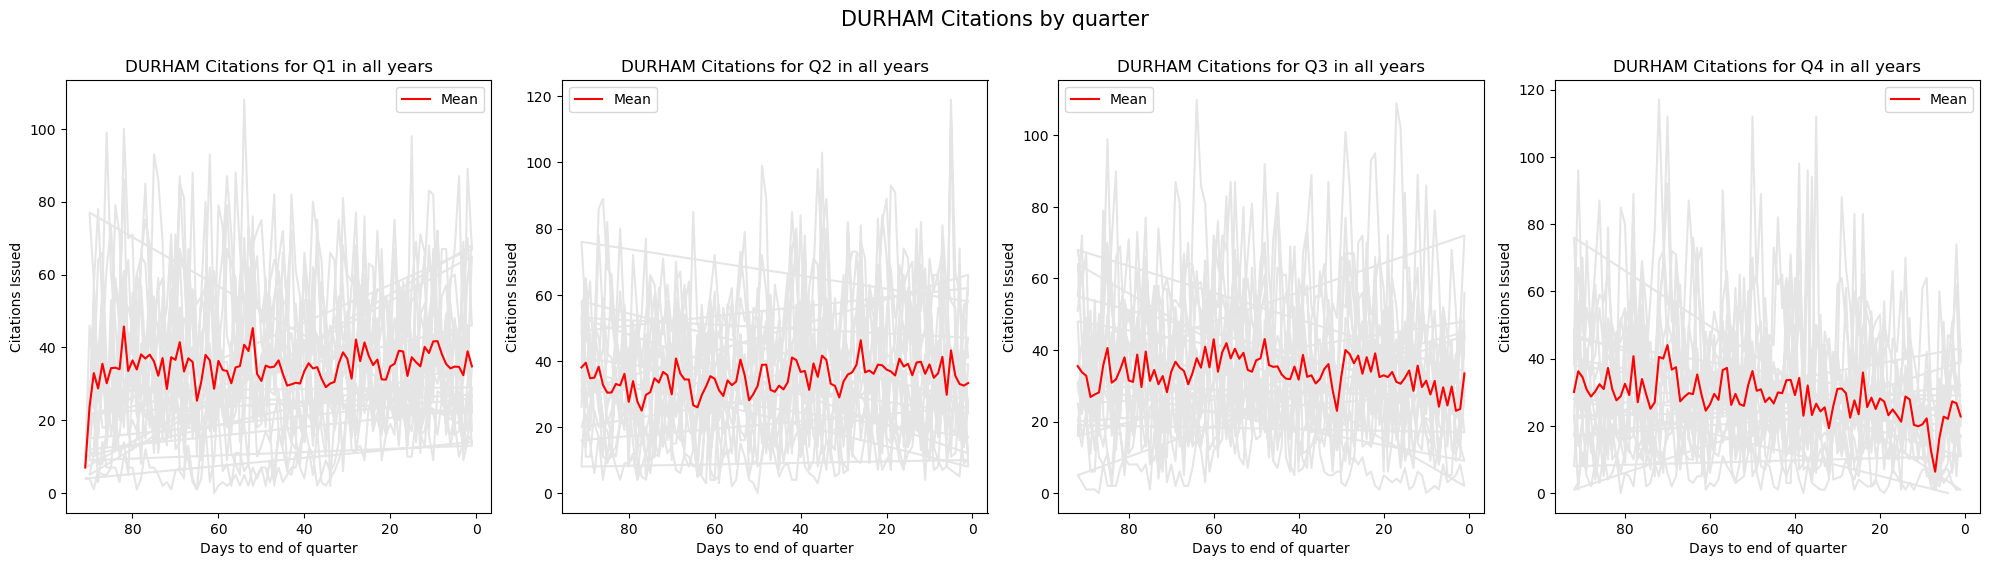

In [209]:
# Plot quarter durham
plot_time_quarter('durham', "quarter", df)

> The only notable spike in Durham is in Q3.

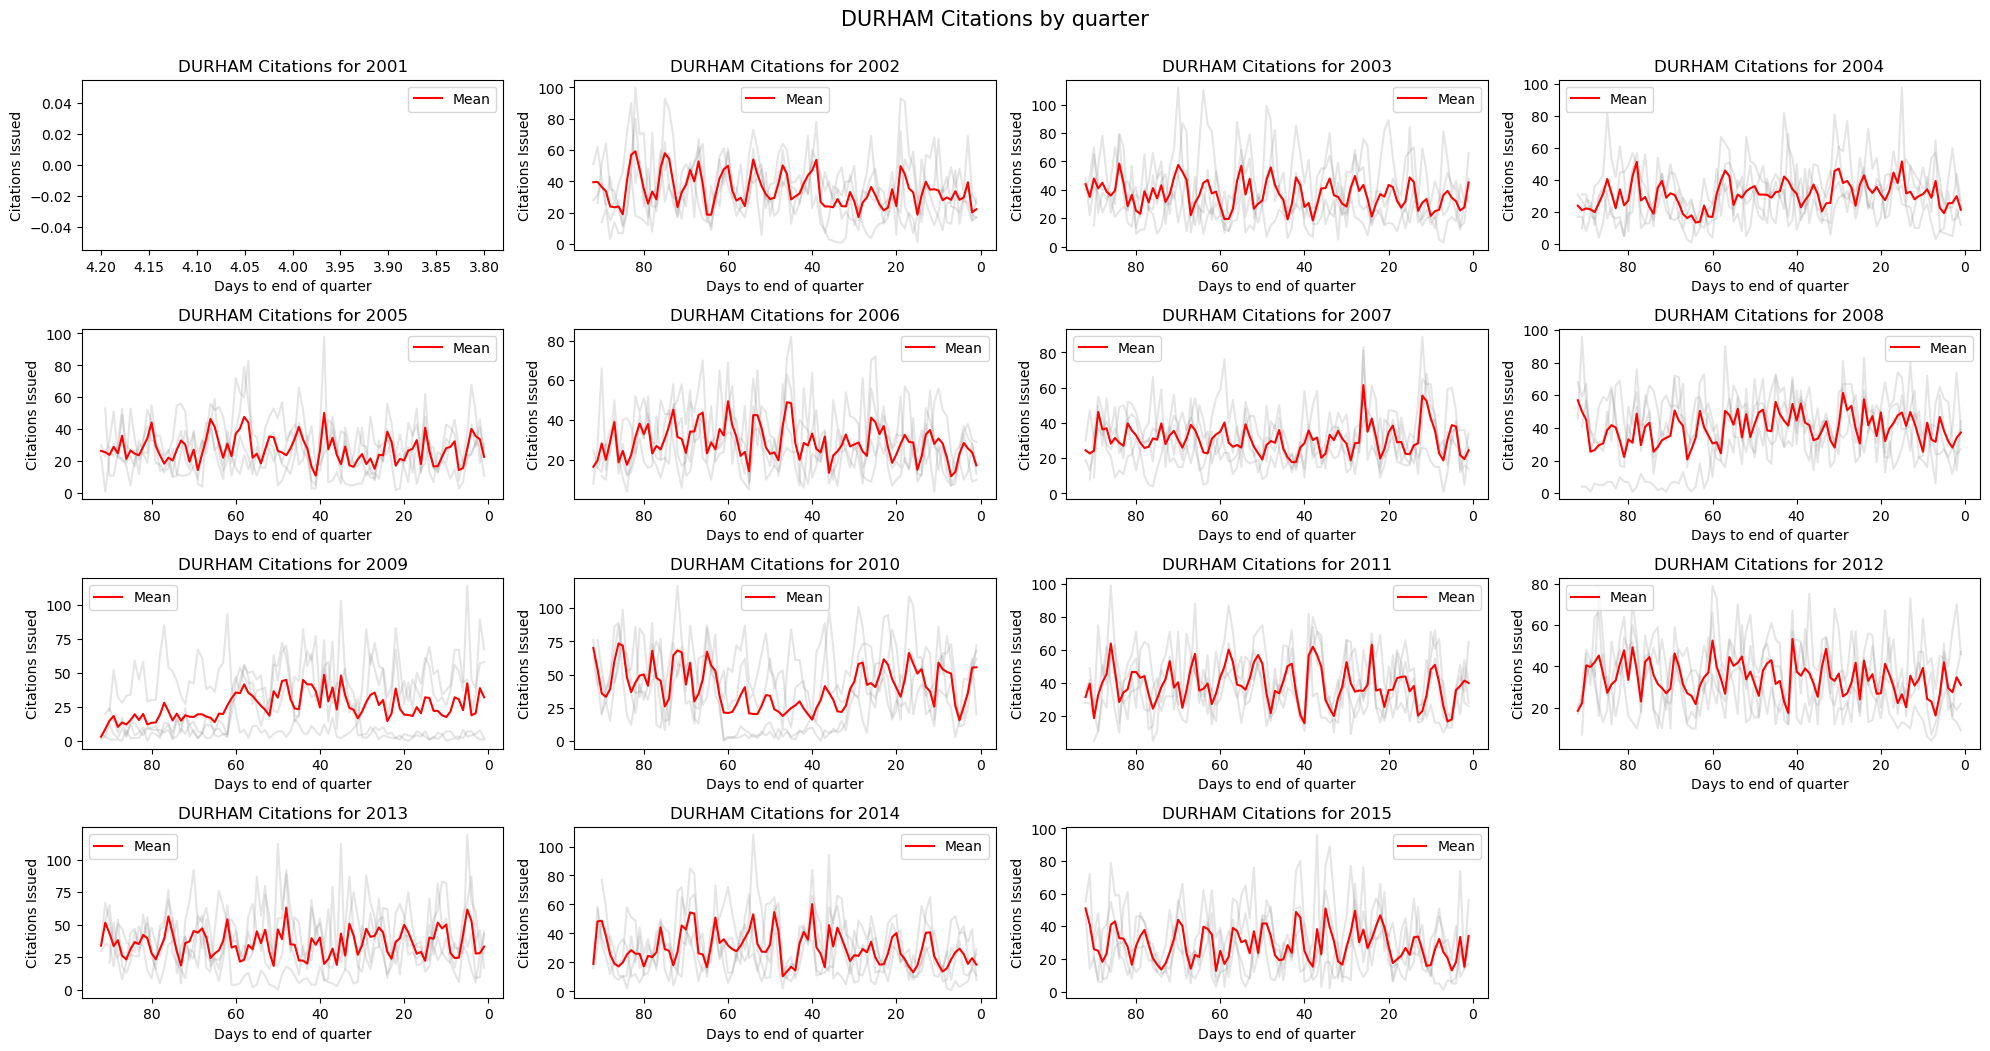

In [170]:
# Checking suspicious years based on days remaining to end of quarter
plot_time_period("durham", "quarter", df)

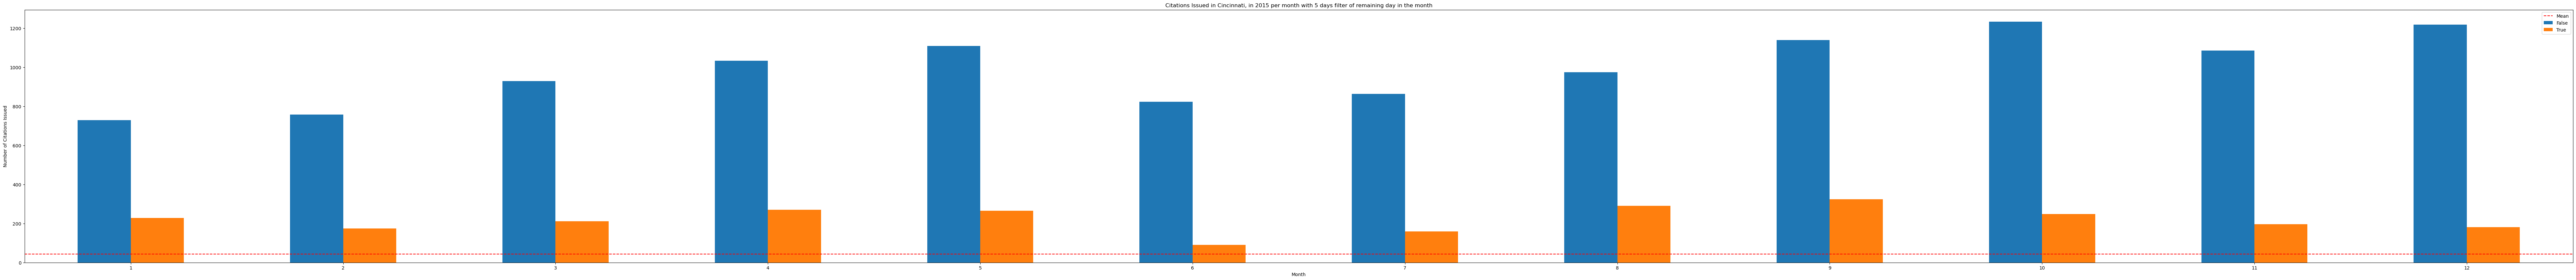

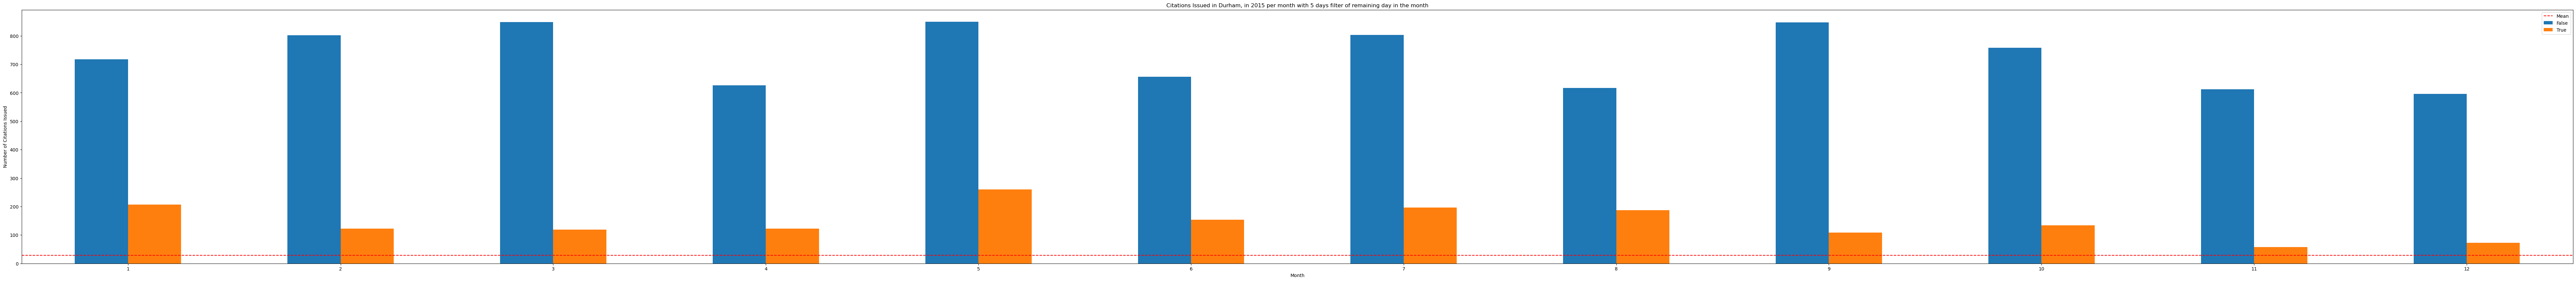

In [127]:
def plot_citations_zoom_out(city: str, year: int, day: int):
    """Function to plot the number of citations issued by month"""
    df = pd.read_csv("../05_clean_data/processed_data.csv")

    # Filter the dataframe based on the city and year
    df_pl = df.loc[(df.city == city) & (df.year == year)].copy()

    # Create a new column named 'countdown' that checks if the days_end_month is less than day using lambda
    df_pl[f"Remaining Days: {day}"] = df_pl["days_end_month"].apply(
        lambda x: True if x < day else False
    )

    # calculate the mean of the column citation_issued when column f'Remaining Days: {day}'
    the_mean = df_pl.loc[
        df_pl[f"Remaining Days: {day}"] == True, "citation_issued"
    ].mean()

    df_pl = (
        df_pl.groupby(["month", f"Remaining Days: {day}"])["citation_issued"]
        .sum()
        .unstack()
    )

    # Plot the bar graph
    df_pl.plot(kind="bar")
    # Capitalize first letter of city
    city = city.capitalize()
    # create a horizontal dotted line at the mean
    plt.axhline(y=the_mean, color="r", linestyle="--")
    # add a legend for the bar and mean line
    plt.legend(["Mean", "False", "True"])
    plt.title(
        f"Citations Issued in {city}, in {year} per month with {day} days filter of remaining day in the month"
    )
    plt.xlabel("Month")
    plt.ylabel("Number of Citations Issued")
    plt.xticks(rotation=0)
    plt.show()

susp_cities = ["cincinnati", "durham"]

# make a loop to plot all the cities
for city in susp_cities:
    plot_citations_zoom_out(city, 2015, 5)


# Zooming in the days in month

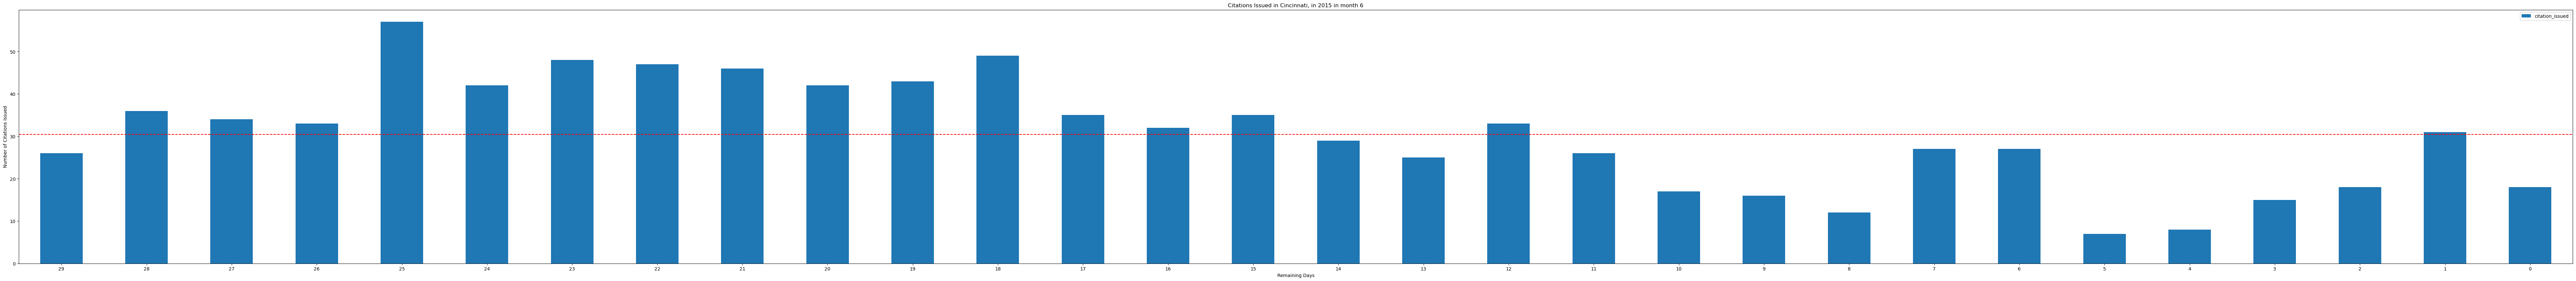

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_citations_zoom_in(city, year, month):
    # Read the dataframe
    df = pd.read_csv("../05_clean_data/processed_data.csv")

    # Filter the dataframe based on the city and year
    df_plot = df.loc[(df.city == city) & (df.year == year) & (df.month == month)].copy()

    # Plot the bar graph
    df_plot.plot(kind="bar", x="days_end_month", y="citation_issued")
    plt.axhline(y=df_plot["citation_issued"].mean(), color="r", linestyle="--")
    city = city.capitalize()
    plt.title(f"Citations Issued in {city}, in {year} in month {month}")
    plt.xlabel("Remaining Days")
    plt.ylabel("Number of Citations Issued")
    plt.xticks(rotation=0)
    # increase the width of the plot to 30
    plt.rcParams["figure.figsize"] = [100, 10]
    plt.show()


# for city in df.city.unique():
#     plot_citations_zoom_in(city, 2015, 6)

plot_citations_zoom_in("cincinnati", 2015, 6)
